<a href="https://www.kaggle.com/junianlim/kaggle-titanic-competition?scriptVersionId=87705883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Kaggle Titanic Competition Walkthrough

This is my first Kaggle competition. I decided to join this competition to practice on my data wrangling, feature engineering and machine learning skills. In this competition I will be using the training dataset provided to predict the survival rate of the testing dataset.<br>
<br>
Since the number of records in the training dataset is not very big, the distribution can be quite skewed and/or not respresentative of the population. So I decided to combine both the training and testing dataset to get a better view of the distribution of each variables and use it to estimate any missing values that present in the dataset.<br>
<br>
On top of that, I also created a few new variables from the existing dataset to better predict the surivival rate. A few cabin-related variables were created to train the model. These variables help provide a sense of the cabin location within the ship, wealth of the passenger and family size. Including these variables in my model helped increase my final test score up to 5%. I've also tried to create ticket-related variables to predict the survival rate, but not much information was successfully derived from it to be able to predict survival rate, so it was not included in the end.<br>
<br>
As this is a classification problem, I will be using models such as Logistic Regression, Random Forest, Support Vector Model and others to predict the survival rate of the testing dataset. I also tried to optimize my model by performing hyperparameter tuning some of my best models. However, due to the duration needed to run train the models, I've decided to include the best parameters only in this notebook. By tuning my models, I managed to boost my final test score by 1-2%, which resulted in a final test score of 78.46% (top 15% in the competition).<br>
<br>
### Best Result:
Random Forest <br>
Train Score - 81.22%<br>
Test Score - 78.46%<br>

### Leaderboard Rank 
Number 1984 (Top 15%)

## Project Overview 
1. Data Preparation
1. Descriptive Statistics & Histogram
1. Fill Missing Values Using Sample Median
1. Feature Engineering
1. Machine Learning Using Classification Models
1. Hyper Parameter Tuning
1. Summary of Results

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Data Preparation

In [3]:
t_train = pd.read_csv('/kaggle/input/titanic/train.csv')
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t_test= pd.read_csv('/kaggle/input/titanic/test.csv')
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
t_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Add new column (IsTrain) to differentiate the 2 dataframe because it will be combined together 
# for feature engineering to better estimate missing values
t_train[['IsTrain']]=1
t_test[['IsTrain']]=0

In [10]:
# Convert 'Survived' column to NaN in test dataframe to concat with train dataframe
t_test[['Survived']] = np.NaN
df1 = pd.concat([t_train, t_test])
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


### 2. Descriptive Statistics & Histogram

In [11]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsTrain
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  IsTrain      1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   
IsTrain        -0.807510       NaN  0.023988 -0.018528  0.033867 -0.005793   

                 Fare   IsTrain  
PassengerId  0.031428 -0.807510  
Survived     0.257307       NaN  
Pclass      -0.558629  0.023988  
Age          0.178740 -0.018528  
SibSp        0.160238  0.033867  
Parch        0.221539 -0.005793  
Fare         1.000000 -0.030831  
IsTrain     -0.030831  1.

<AxesSubplot:>

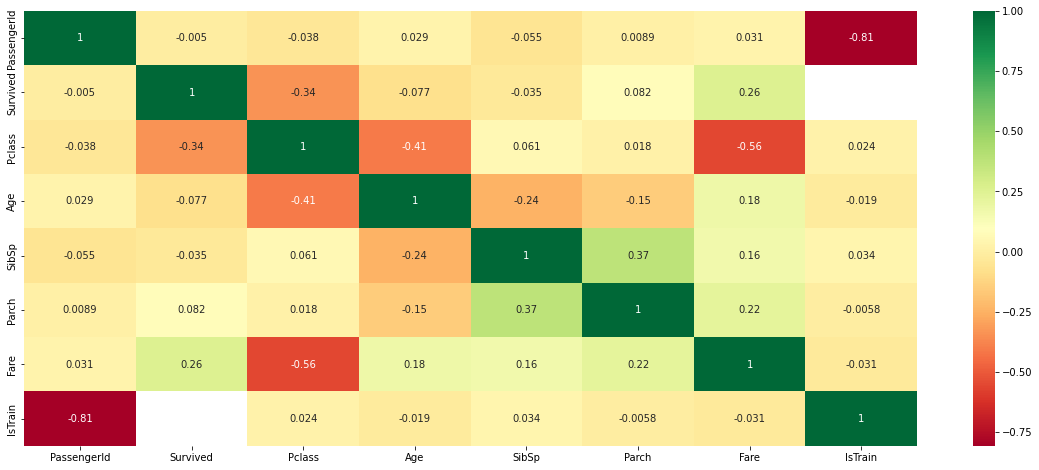

In [13]:
print(df1.corr())
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), cmap='RdYlGn', annot=True)

In [14]:
# Check histogram of each columns
'''for i in df1.columns:
    plt.hist(df1[i])
    plt.title(i)
    plt.show()'''

'for i in df1.columns:\n    plt.hist(df1[i])\n    plt.title(i)\n    plt.show()'

In [15]:
df1[['Female','Male']] = pd.get_dummies(df1.Sex)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [16]:
df1.groupby('Embarked')[['PassengerId']].count()

,PassengerId
Embarked,
C,270
Q,123
S,914


### 3) Fill Missing Values Using Sample Median

In [17]:
df1[df1.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1,0


In [18]:
df1[['C','Q','S']] = pd.get_dummies(df1.Embarked)
df1.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male,C,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0,1,0,1,0


In [19]:
df1[df1.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male,C,Q,S
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0,1,0,0,1


In [20]:
df1.loc[(df1.Sex=='male')&(df1.Pclass==3)].groupby(['Embarked','Sex','Pclass','Survived'])[['Fare']].median()

Fare
Embarked Sex  Pclass Survived        
C        male 3      0.0       7.2292
                     1.0       9.8792
Q        male 3      0.0       7.7500
                     1.0       7.7500
S        male 3      0.0       8.0500
                     1.0       8.0500

In [21]:
# Fill missing value for Fare based on the variables that are available
df1.Fare.fillna(8.0500,inplace=True)
df1.iloc[[152]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male,C,Q,S
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.05,NaN,S,1,0,1,0,0,1


In [22]:
df1.groupby(['Embarked','Sex','Pclass'])[['Age']].median()

Age
Embarked Sex    Pclass       
C        female 1       38.00
                2       23.00
                3       15.00
         male   1       39.00
                2       29.00
                3       24.25
Q        female 1       35.00
                2       30.00
                3       22.00
         male   1       44.00
                2       59.00
                3       25.00
S        female 1       34.00
                2       28.00
                3       22.00
         male   1       42.00
                2       29.00
                3       25.00

In [23]:
# Fill missing values using sample median of Embarked, Sex and Pclass
# Using median rather than mean because of outliers
# Using 3 variables (Embarked, Sex and Pclass) to create more varied distribution
df1.loc[(df1.Embarked=='C')&(df1.Sex=='female')&(df1.Pclass==1),'Age']=38
df1.loc[(df1.Embarked=='C')&(df1.Sex=='female')&(df1.Pclass==2),'Age']=23
df1.loc[(df1.Embarked=='C')&(df1.Sex=='female')&(df1.Pclass==3),'Age']=15
df1.loc[(df1.Embarked=='C')&(df1.Sex=='male')&(df1.Pclass==1),'Age']=39
df1.loc[(df1.Embarked=='C')&(df1.Sex=='male')&(df1.Pclass==2),'Age']=29
df1.loc[(df1.Embarked=='C')&(df1.Sex=='male')&(df1.Pclass==3),'Age']=24.25
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='female')&(df1.Pclass==1),'Age']=35
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='female')&(df1.Pclass==2),'Age']=30
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='female')&(df1.Pclass==3),'Age']=22
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='male')&(df1.Pclass==1),'Age']=44
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='male')&(df1.Pclass==2),'Age']=59
df1.loc[(df1.Embarked=='Q')&(df1.Sex=='male')&(df1.Pclass==3),'Age']=25
df1.loc[(df1.Embarked=='S')&(df1.Sex=='female')&(df1.Pclass==1),'Age']=34
df1.loc[(df1.Embarked=='S')&(df1.Sex=='female')&(df1.Pclass==2),'Age']=28
df1.loc[(df1.Embarked=='S')&(df1.Sex=='female')&(df1.Pclass==3),'Age']=22
df1.loc[(df1.Embarked=='S')&(df1.Sex=='male')&(df1.Pclass==1),'Age']=42
df1.loc[(df1.Embarked=='S')&(df1.Sex=='male')&(df1.Pclass==2),'Age']=29
df1.loc[(df1.Embarked=='S')&(df1.Sex=='male')&(df1.Pclass==3),'Age']=25
df1[df1.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain,Female,Male,C,Q,S


### 4. Feature Engineering

#### Feature Engineering Overview

First, create 4 new columns (NumCabin, CabinLetter, CabinNum and CabNum) will be derived from Cabin column to better predict survival rate<br>

Description of each columns:<br>
NumCabin - Number of cabins<br>
CabinLetter - First letter of cabin (alphabet)<br>
CabinNum - Cabin number (digit)<br>
CabNum - Cabin number scaled based on quantile<br>

Second, transform skewed data using natural log in attempt to normalize the distribution, although some columns have high number of missing data (cabin-related columns)

Lastly, drop missing value for Embarked (2 rows only) because unable estimate the actual value for that column based on Sex, Pclass, Age and Fare



In [24]:
# Creating a new dataframe for Cabin as it seems like a useful variable even though it has a lot of missing values
Cabin=df1.Cabin
df2 = pd.DataFrame(data=Cabin)
df2.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [25]:
# Some rows have multiple Cabins, splitting each cabin into different columns
df2[['c1','c2','c3','c4']]=df2.Cabin.str.split(' ', expand=True)
df2.head()

,Cabin,c1,c2,c3,c4
0,NaN,NaN,NaN,NaN,NaN
1,C85,C85,None,None,None
2,NaN,NaN,NaN,NaN,NaN
3,C123,C123,None,None,None
4,NaN,NaN,NaN,NaN,NaN


In [26]:
# Adding surival to identify any variables that can predict survival rate
df2['Survived'] = df1.Survived
# Adding new columns, number of cabin (NumCabin) and first letter of cabin (CabinLetter)
df2[['NumCabin','CabinLetter']]=0
df2

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,C85,C85,NaN,NaN,NaN,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,1.0,0,0
3,C123,C123,NaN,NaN,NaN,1.0,0,0
4,NaN,NaN,NaN,NaN,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,0,0
414,C105,C105,NaN,NaN,NaN,NaN,0,0
415,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [27]:
# if passenger have 4 cabins, then NumCabin = 4
# This could be indicator of wealth and family size, both could help predict survival rate
df2.loc[(df2.c4.notna()),'NumCabin']=4
df2.loc[(df2.c3.notna())&(df2.c4.isna()),'NumCabin']=3
df2.loc[(df2.c2.notna())&(df2.c3.isna()),'NumCabin']=2
df2.loc[(df2.c1.notna())&(df2.c2.isna()),'NumCabin']=1
df2

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,C85,C85,NaN,NaN,NaN,1.0,1,0
2,NaN,NaN,NaN,NaN,NaN,1.0,0,0
3,C123,C123,NaN,NaN,NaN,1.0,1,0
4,NaN,NaN,NaN,NaN,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,0,0
414,C105,C105,NaN,NaN,NaN,NaN,1,0
415,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [28]:
# CabinLetter will be a numeric variable, A=1, B=2, C=3... and could possibly indicate a level within the ship
# if the crash hit worse on lower levels, then we could hypothesized that 
# passengers in those areas are less likely to survived, given that they are in their cabin during the crash 
# and didn't manage to escape
df2.loc[(df2.c1.str.match('^A.*')==True),'CabinLetter']=1
df2.loc[(df2.c1.str.match('^B.*')==True),'CabinLetter']=2
df2.loc[(df2.c1.str.match('^C.*')==True),'CabinLetter']=3
df2.loc[(df2.c1.str.match('^D.*')==True),'CabinLetter']=4
df2.loc[(df2.c1.str.match('^E.*')==True),'CabinLetter']=5
df2.loc[(df2.c1.str.match('^F.*')==True),'CabinLetter']=6
df2.loc[(df2.c1.str.match('^G.*')==True),'CabinLetter']=7
df2.head()

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,C85,C85,None,None,None,1.0,1,3
2,NaN,NaN,NaN,NaN,NaN,1.0,0,0
3,C123,C123,None,None,None,1.0,1,3
4,NaN,NaN,NaN,NaN,NaN,0.0,0,0


In [29]:
df2[df2.CabinLetter!=0]

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter
1,C85,C85,None,None,None,1.0,1,3
3,C123,C123,None,None,None,1.0,1,3
6,E46,E46,None,None,None,0.0,1,5
10,G6,G6,None,None,None,1.0,1,7
11,C103,C103,None,None,None,1.0,1,3
...,...,...,...,...,...,...,...,...
404,D40,D40,None,None,None,NaN,1,4
405,D38,D38,None,None,None,NaN,1,4
407,C80,C80,None,None,None,NaN,1,3
411,C78,C78,None,None,None,NaN,1,3


In [30]:
# New variable, cabin number (CabinNum) to get the digits of the cabin only
# this could tell us where their cabin is located in the ship
# If the cabins are ordered ascendingly from one end to the other, maybe cabins of a certain range endured worse impact 
# and have lower survival rate, given that they were in their cabin during the crash and didn't manage to escape
df2[['X','CabinNum']]=df2.c1.str.split('[^.]',1,expand=True)
df2.drop('X',axis=1, inplace=True)
df2['CabinNum'] = pd.to_numeric(df2['CabinNum'])
df2

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter,CabinNum
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN
1,C85,C85,None,None,None,1.0,1,3,85.0
2,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN
3,C123,C123,None,None,None,1.0,1,3,123.0
4,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
414,C105,C105,None,None,None,NaN,1,3,105.0
415,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
416,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN


(array([45., 57., 50., 42., 17., 25., 24.,  8., 13.,  1.]),
 array([  2. ,  16.6,  31.2,  45.8,  60.4,  75. ,  89.6, 104.2, 118.8,
        133.4, 148. ]),
 <BarContainer object of 10 artists>)

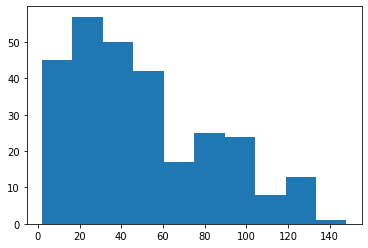

In [31]:
# CabinNum is not normally distributed, the dataset have higher number of cabins in the lower end (digits)
plt.hist(df2.CabinNum)

In [32]:
df2.describe()

,Survived,NumCabin,CabinLetter,CabinNum
count,891.000000,1309.000000,1309.000000,282.000000
mean,0.383838,0.271963,0.751719,49.273050
std,0.486592,0.574151,1.551932,34.339936
min,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,23.000000
50%,0.000000,0.000000,0.000000,40.500000
75%,1.000000,0.000000,0.000000,76.000000
max,1.000000,4.000000,7.000000,148.000000


In [33]:
# CabinNum is not normally distributed, will split it into 4 groups based on 25,50,75 quantiles 
# to see if it has better predictive power
df2['CabNum']=np.NAN
df2.loc[df2.CabinNum<23,'CabNum']=1
df2.loc[(df2.CabinNum>=23)&(df2.CabinNum<40.5),'CabNum']=2
df2.loc[(df2.CabinNum>40.5)&(df2.CabinNum<76),'CabNum']=3
df2.loc[(df2.CabinNum>76),'CabNum']=4
df2.head()

,Cabin,c1,c2,c3,c4,Survived,NumCabin,CabinLetter,CabinNum,CabNum
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN
1,C85,C85,None,None,None,1.0,1,3,85.0,4.0
2,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN,NaN
3,C123,C123,None,None,None,1.0,1,3,123.0,4.0
4,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN


In [34]:
# Grouping columns with Survival to identify any variables that correlates with survival
df2.groupby(['NumCabin'])[['Survived']].mean()

,Survived
NumCabin,
0,0.299854
1,0.677778
2,0.562500
3,0.500000
4,1.000000


In [35]:
df2.groupby(['CabinLetter'])[['Survived']].mean()

,Survived
CabinLetter,
0,0.299419
1,0.466667
2,0.744681
3,0.593220
4,0.757576
5,0.750000
6,0.615385
7,0.500000


In [36]:
df2.groupby(['CabinNum'])[['Survived']].mean()

,Survived
CabinNum,
2.0,0.600000
3.0,1.000000
4.0,1.000000
5.0,0.666667
6.0,0.500000
...,...
126.0,1.000000
128.0,0.000000
130.0,NaN


In [37]:
df2.groupby(['CabNum'])[['Survived']].mean()

,Survived
CabNum,
1.0,0.725490
2.0,0.680851
3.0,0.666667
4.0,0.641509


In [38]:
df2.groupby(['Survived'])[['NumCabin','CabinLetter','CabinNum','CabNum']].mean()

,NumCabin,CabinLetter,CabinNum,CabNum
Survived,,,,
0.0,0.147541,0.400729,52.936508,2.619048
1.0,0.459064,1.356725,48.759398,2.458647


In [39]:
# Adding all 4 new columns to main dataframe, which will be used in final model
df1[['NumCabin','CabinLetter','CabinNum','CabNum']]=df2[['NumCabin','CabinLetter','CabinNum','CabNum']]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsTrain,Female,Male,C,Q,S,NumCabin,CabinLetter,CabinNum,CabNum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,25.00,1,0,A/5 21171,7.2500,...,1,0,1,0,0,1,0,0,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,...,1,1,0,1,0,0,1,3,85.0,4.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,22.00,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,1,0,0,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.00,1,0,113803,53.1000,...,1,1,0,0,0,1,1,3,123.0,4.0
4,5,0.0,3,"Allen, Mr. William Henry",male,25.00,0,0,373450,8.0500,...,1,0,1,0,0,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,25.00,0,0,A.5. 3236,8.0500,...,0,0,1,0,0,1,0,0,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,38.00,0,0,PC 17758,108.9000,...,0,1,0,1,0,0,1,3,105.0,4.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,25.00,0,0,SOTON/O.Q. 3101262,7.2500,...,0,0,1,0,0,1,0,0,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,25.00,0,0,359309,8.0500,...,0,0,1,0,0,1,0,0,NaN,NaN


In [40]:
# Only null values remaining are Cabin and Embarked (2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  IsTrain      1309 non-null   int64  
 13  Female       1309 non-null   uint8  
 14  Male         1309 non-null   uint8  
 15  C            1309 non-null   uint8  
 16  Q            1309 non-null   uint8  
 17  S            1309 non-null   uint8  
 18  NumCabin     1309 non-null   int64  
 19  CabinLe

In [41]:
# Converting NaN to 0 for classification models because there are too many to reliably use any other values
df1.loc[df1.NumCabin.isna(),'NumCabin']=0
df1.loc[df1.CabinLetter.isna(),'CabinLetter']=0
df1.loc[df1.CabinNum.isna(),'CabinNum']=0
df1.loc[df1.CabNum.isna(),'CabNum']=0
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsTrain,Female,Male,C,Q,S,NumCabin,CabinLetter,CabinNum,CabNum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,1,0,0,0.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,0,1,0,0,1,3,85.0,4.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,22.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,1,0,0,0.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.0,1,0,113803,53.1000,...,1,1,0,0,0,1,1,3,123.0,4.0
4,5,0.0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,...,1,0,1,0,0,1,0,0,0.0,0.0


<AxesSubplot:>

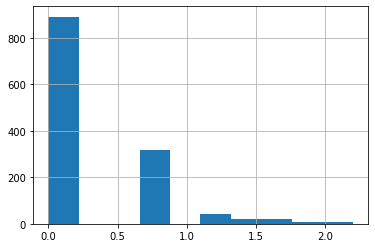

In [42]:
# Transforming variables to help with classification models
# Since a number of them are quite skewed, natural log will be used instead of standardscaler
# Impact of using natural log is low since we will be training our dataset 
# and using columns that have the most predictive power to least
df1['norm_sibsp'] = np.log(df1.SibSp+1)
df1['norm_sibsp'].hist()

<AxesSubplot:>

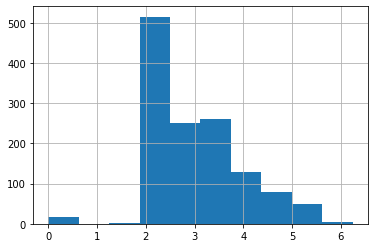

In [43]:
df1['norm_fare'] = np.log(df1.Fare+1)
df1['norm_fare'].hist()

<AxesSubplot:>

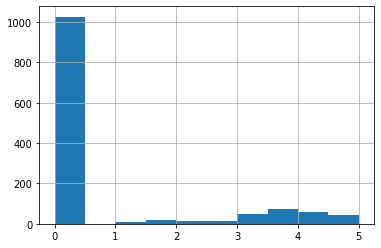

In [44]:
# Some cabin information will still be skewed after log transformation because there are a lot of null values
df1['norm_cabinnum'] = np.log(df1.CabinNum+1)
df1['norm_cabinnum'].hist()

<AxesSubplot:>

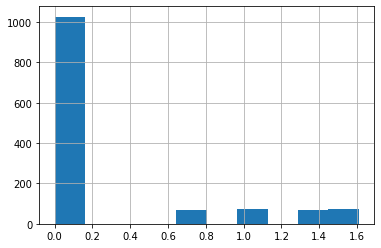

In [45]:
df1['norm_cabnum'] = np.log(df1.CabNum+1)
df1['norm_cabnum'].hist()

<AxesSubplot:>

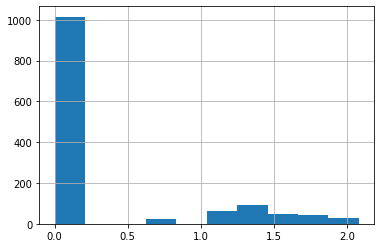

In [46]:
df1['norm_cabinletter'] = np.log(df1.CabinLetter+1)
df1['norm_cabinletter'].hist()

<AxesSubplot:>

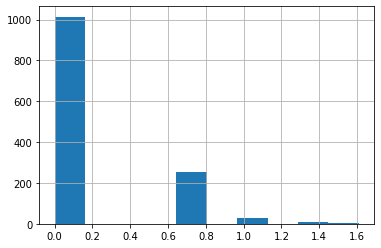

In [47]:
df1['norm_numcabin'] = np.log(df1.NumCabin+1)
df1['norm_numcabin'].hist()

<AxesSubplot:>

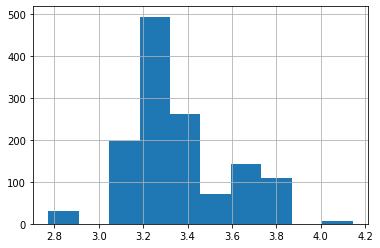

In [48]:
df1['norm_age'] = np.log(df1.Age+1)
df1['norm_age'].hist()

In [49]:
df1.Pclass = df1.Pclass.astype(str)
df1[['C1','C2','C3']]=pd.get_dummies(df1.Pclass)

In [50]:
# Drop NA because unable to predict the value based on other columns and only 2 rows have NA
df1.dropna(subset=['Embarked'], inplace=True)

### 5. Machine Learning Using Classification Models

In [51]:
df1_train=df1[df1.IsTrain==1]
df1_test=df1[df1.IsTrain==0]
df1_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,norm_sibsp,norm_fare,norm_cabinnum,norm_cabnum,norm_cabinletter,norm_numcabin,norm_age,C1,C2,C3
0,1,0.0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,...,0.693147,2.110213,0.000000,0.000000,0.000000,0.000000,3.258097,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.693147,4.280593,4.454347,1.609438,1.386294,0.693147,3.663562,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,22.0,0,0,STON/O2. 3101282,7.9250,...,0.000000,2.188856,0.000000,0.000000,0.000000,0.000000,3.135494,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.0,1,0,113803,53.1000,...,0.693147,3.990834,4.820282,1.609438,1.386294,0.693147,3.555348,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,...,0.000000,2.202765,0.000000,0.000000,0.000000,0.000000,3.258097,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,29.0,0,0,211536,13.0000,...,0.000000,2.639057,0.000000,0.000000,0.000000,0.000000,3.401197,0,1,0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,34.0,0,0,112053,30.0000,...,0.000000,3.433987,3.761200,1.386294,1.098612,0.693147,3.555348,1,0,0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,...,0.693147,3.196630,0.000000,0.000000,0.000000,0.000000,3.135494,0,0,1
889,890,1.0,1,"Behr, Mr. Karl Howell",male,39.0,0,0,111369,30.0000,...,0.000000,3.433987,5.003946,1.609438,1.386294,0.693147,3.688879,1,0,0


In [52]:
# Splitting them into train and test set like how it was originally
df1_trainx7 =df1_train[['Pclass','Age','SibSp','Parch','Fare','Female','Male','C','Q','S','NumCabin','CabinLetter','C1','C2','C3','norm_sibsp','norm_fare','CabinNum','CabNum','norm_cabinnum','norm_cabnum','norm_cabinletter','norm_numcabin','norm_age']]
df1_testx7 =df1_test[['Pclass','Age','SibSp','Parch','Fare','Female','Male','C','Q','S','NumCabin','CabinLetter','C1','C2','C3','norm_sibsp','norm_fare','CabinNum','CabNum','norm_cabinnum','norm_cabnum','norm_cabinletter','norm_numcabin','norm_age']]
df1_trainx7

,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S,...,C3,norm_sibsp,norm_fare,CabinNum,CabNum,norm_cabinnum,norm_cabnum,norm_cabinletter,norm_numcabin,norm_age
0,3,25.0,1,0,7.2500,0,1,0,0,1,...,1,0.693147,2.110213,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.258097
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0.693147,4.280593,85.0,4.0,4.454347,1.609438,1.386294,0.693147,3.663562
2,3,22.0,0,0,7.9250,1,0,0,0,1,...,1,0.000000,2.188856,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.135494
3,1,34.0,1,0,53.1000,1,0,0,0,1,...,0,0.693147,3.990834,123.0,4.0,4.820282,1.609438,1.386294,0.693147,3.555348
4,3,25.0,0,0,8.0500,0,1,0,0,1,...,1,0.000000,2.202765,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.258097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,29.0,0,0,13.0000,0,1,0,0,1,...,0,0.000000,2.639057,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.401197
887,1,34.0,0,0,30.0000,1,0,0,0,1,...,0,0.000000,3.433987,42.0,3.0,3.761200,1.386294,1.098612,0.693147,3.555348
888,3,22.0,1,2,23.4500,1,0,0,0,1,...,1,0.693147,3.196630,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.135494
889,1,39.0,0,0,30.0000,0,1,1,0,0,...,0,0.000000,3.433987,148.0,4.0,5.003946,1.609438,1.386294,0.693147,3.688879


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [54]:
# Creating a function to print the best score and parameters for each model given
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [55]:
gnb = GaussianNB()
cv = cross_val_score(gnb,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.64606742 0.69662921 0.69662921 0.73595506 0.76836158]
0.7087284961594617


In [56]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.79775281 0.79213483 0.78089888 0.80225989]
0.7907890560528154


In [57]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.74719101 0.84831461 0.78651685 0.79661017]
0.7851647305275187


In [58]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.67977528 0.6741573  0.76404494 0.76966292 0.73446328]
0.7244207452548721


In [59]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.76966292 0.85393258 0.79775281 0.80225989]
0.7975306290865232


In [60]:
svc = SVC(probability = True)
cv = cross_val_score(svc,df1_trainx7,df1_train.Survived,cv=5)
print(cv)
print(cv.mean())

[0.62359551 0.70786517 0.65730337 0.73595506 0.71186441]
0.6873167015806512


### 6. Hyper Parameter Tuning

In [61]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [7,9,10,11],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree','brute'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(df1_trainx7,df1_train.Survived)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.7s


KNN
Best Score: 0.7874246175331683
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    4.1s finished


In [62]:
# Parameters have been reduced because it takes too long to run, these are the best parameter based on my testing
svc = SVC(probability = True)
param_grid = tuned_parameters = [
                                 {'kernel': ['poly'], 'degree' : [2], 'C': [ 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(df1_trainx7,df1_train.Survived)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished


SVC
Best Score: 0.7930425950612582
Best Parameters: {'C': 1000, 'degree': 2, 'kernel': 'poly'}


In [63]:
# Parameters have been reduced because it takes too long to run, these are the best parameter based on my testing
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400],
               'criterion':['entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [12],
                                  'max_features': [10],
                                  'min_samples_leaf': [2],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(df1_trainx7,df1_train.Survived)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


Random Forest
Best Score: 0.8121627626483845
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


<AxesSubplot:>

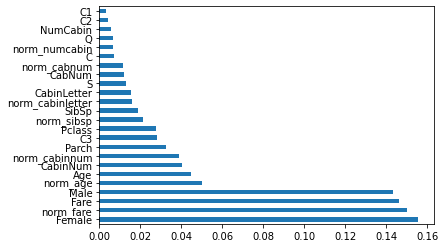

In [64]:
# Visual guide to which variables have the best predict power
best_rf = best_clf_rf.best_estimator_.fit(df1_trainx7,df1_train.Survived)
feat_importances = pd.Series(best_rf.feature_importances_, index=df1_trainx7.columns)
feat_importances.nlargest(30).plot(kind='barh')
# CabinNum (Cabin digit) and CabinLetter (Cabin alphabet) were quite high among cabin-related columns

### 7. Summary of Results
Train Scores after tuning the models (ranked ascending order):
1. Random Forest - 81.22%
1. Support Vector Model - 79.30%
1. K Nearest Neighbour - 78.74%

Random Forest have the highest train score and it will be used to predict the survival rate for the testing dataset. Other models were also used to predict the survival rate as well, but had lower test scores and was excluded from this notebook.

In [65]:
y_hat_best_rf12 =clf_rf.predict(df1_testx7).astype(int)

In [66]:
df1_testx7_best_rf12={'PassengerId':df1_test.PassengerId,'Survived':y_hat_best_rf12}
df1_testx7_best_rf12=pd.DataFrame(data=df1_testx7_best_rf12)

In [67]:
df1_testx7_best_rf12.to_csv('df1_testx7_best_rf12.csv', index=False)

The survival rate have been predicted for the testing dataset using the random forest model and will be submitted to the competition